# <center>MDS6212 Fintech Theory and Practice: Week 5 Assignment<center>

----
    
**220041006 *Yihang Li***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Questions-1:" data-toc-modified-id="Questions-1:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Questions 1:</a></span><ul class="toc-item"><li><span><a href="#Explore-the-Search-Index-for-U.S.-China-political-relation" data-toc-modified-id="Explore-the-Search-Index-for-U.S.-China-political-relation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explore the Search Index for U.S.-China political relation</a></span></li><li><span><a href="#draw-the-variable-in-a-graph,-and-discuss-its-time-series-variation" data-toc-modified-id="draw-the-variable-in-a-graph,-and-discuss-its-time-series-variation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>draw the variable in a graph, and discuss its time-series variation</a></span></li></ul></li><li><span><a href="#Questions-2:" data-toc-modified-id="Questions-2:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Questions 2:</a></span><ul class="toc-item"><li><span><a href="#The-search-volume-of-Donald-Trump-and-Joe-Biden" data-toc-modified-id="The-search-volume-of-Donald-Trump-and-Joe-Biden-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The search volume of Donald Trump and Joe Biden</a></span></li></ul></li><li><span><a href="#Question-3:" data-toc-modified-id="Question-3:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3:</a></span></li></ul></div>

[Reference](https://datapane.com/blog/2020/09/01/building-google-trends-report-using-python/)

## Questions 1:
   using [Google Trends](https://trends.google.com/trends/?geo=US), construct a weekly index to capture political relations between U.S. and China from the US perspective, draw the variable in a graph, and discuss its time-series variation

> **Note: the index in google trends is already weekly**

<!-- !datapane login --server=https://datapane.com/ --token=<d95b6dc19091f789ac6af9a7026844a49c7b68c5> -->

<!-- import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pytrends.request import TrendReq
import altair as alt
import plotly.express as px -->

### Explore the Search Index for U.S.-China political relation

> Note:use pytrends for automating downloading of reports from Google Trends.

**Reference: [Timeline-U.S. Relations With China](https://www.cfr.org/timeline/us-relations-china)**
    
> **Since 1949, U.S.-China relations have evolved from tense standoffs to a complex mix of intensifying diplomacy, growing international rivalry, and increasingly intertwined economies.**

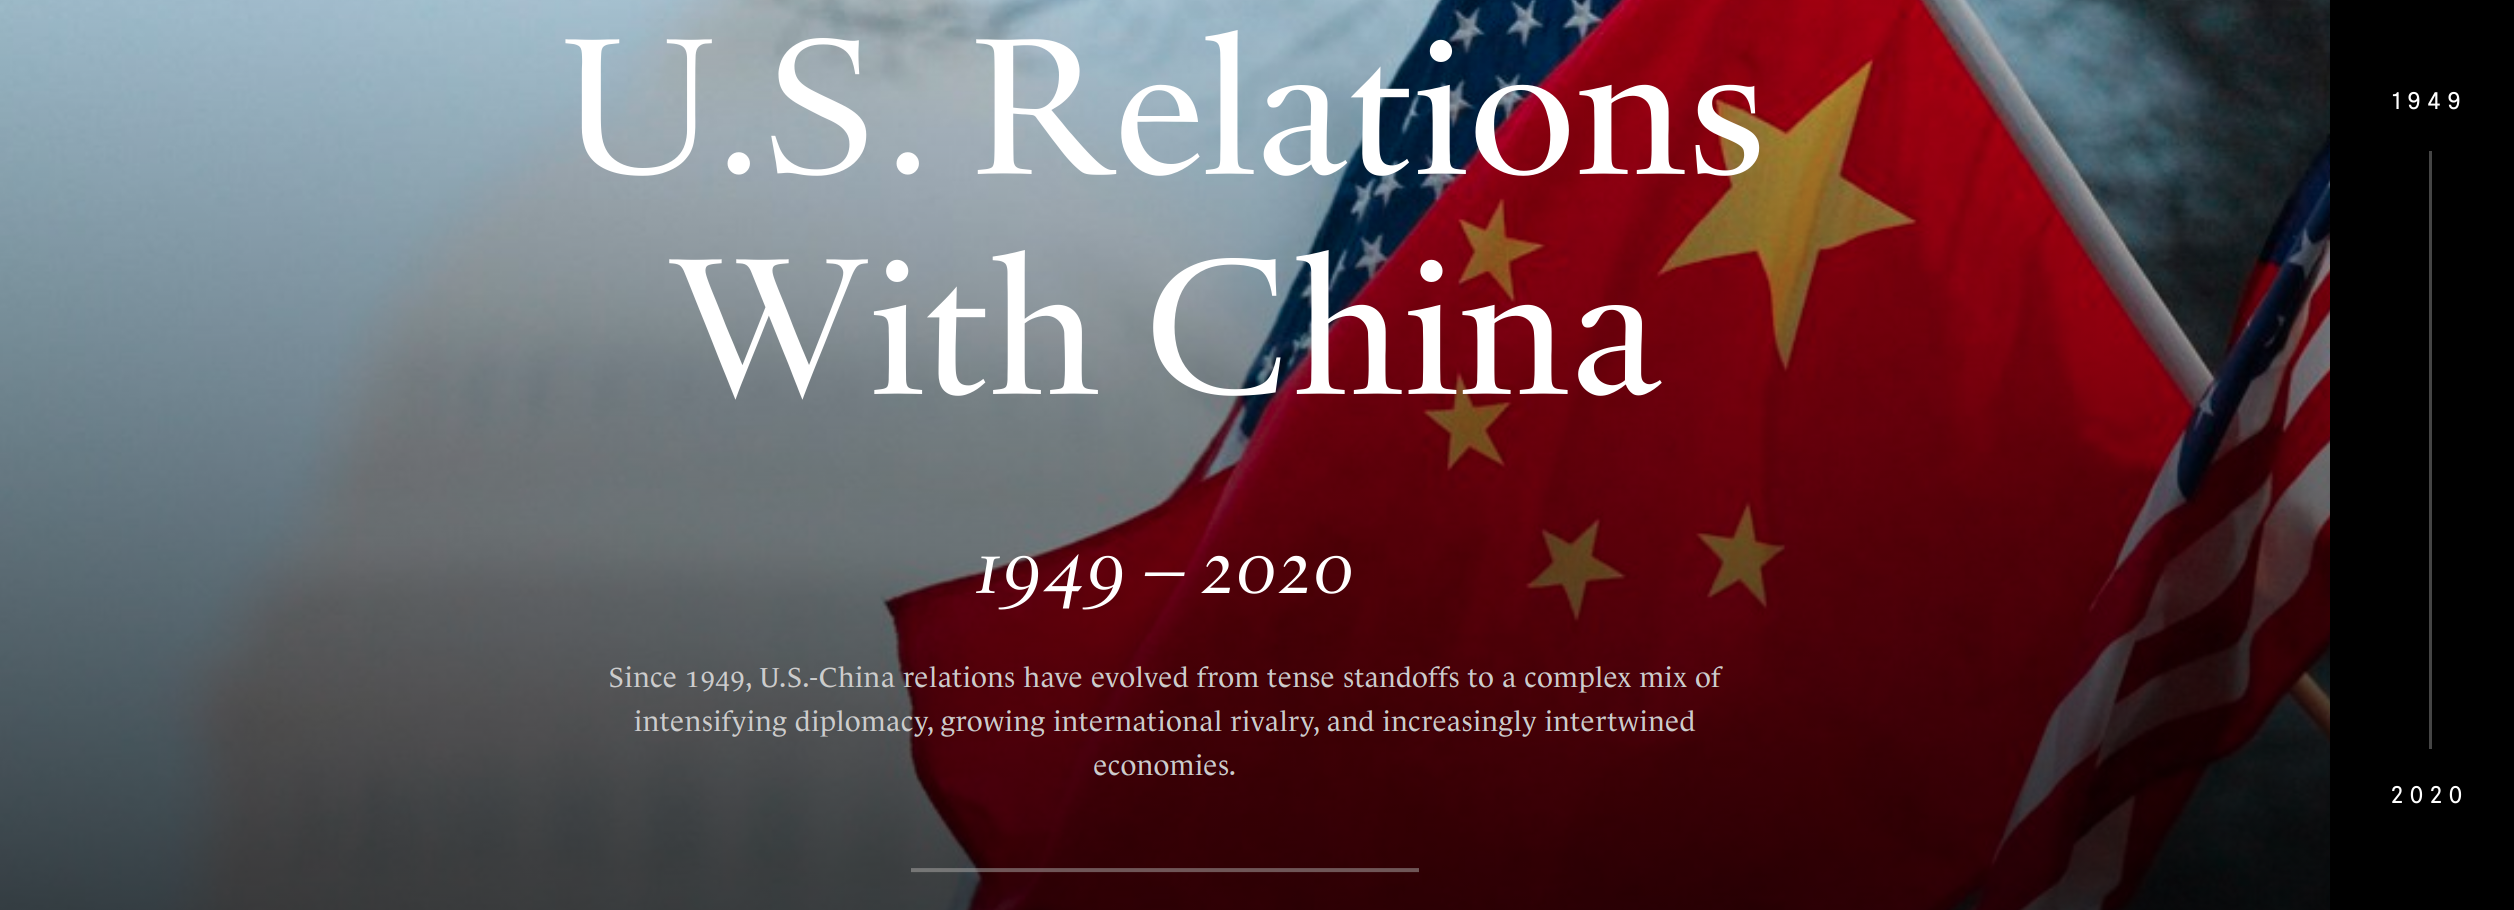

> **From the reference above, we present a wordcloud below by extracting the title of every historical points from 1949(e.g. 'PRC established') to 2020(e.g. ''Pompeo Says Engagement With China Has Failed'') from the US perspective**

<!-- #wordcloud
kw_list = [
    'PRC established',
    'Korean War',
    'Taiwan Strait Crisis',
    'Tibetan Uprising',
    'China’s First Atomic Test',
    'Sino-Soviet Border Conflict',
    'Ping-Pong Diplomacy',
    'Nixon Visits China',
    'Formal Ties and One China Policy',
    'China in the Reagan Era',
    'Tiananmen Square Massacre',
    'Prominent Dissidents Deported',
    'Taiwan’s First Free Presidential Vote',
    'Belgrade Embassy Bombing',
    'Normalized Trade Relations',
    'U.S.-Sino Spy Plane Standoff',
    'Responsible Stakeholder',
    'China Increases Military Spending',
    'China Becomes Largest U.S. Foreign Creditor',
    'China Becomes World’s Second-Largest Economy',
    'U.S. ‘Pivots’ Toward Asia',
    'Rising Trade Tensions',
    'Dissident Flees to U.S. Embassy',
    'China’s New Leadership',
    'Sunnylands Summit',
    'U.S. Indicts Chinese Nationals',
    'Joint Climate Announcement',
    'U.S. Warns China Over South China Sea',
    'Trump Affirms One China Policy After Raising Doubts',
    'Trump Hosts Xi at Mar-a-Lago',
    'Trump Tariffs Target China',
    'U.S.-China Trade War Escalates',
    'Pence Speech Signals Hard-Line Approach',
    'Canada Arrests Huawei Executive',
    'Huawei Sues the United States',
    'Trade War Intensifies',
    'U.S. Labels China a Currency Manipulator',
    'Trump Signs Bill Supporting Hong Kong Protesters',
    '‘Phase One’ Trade Deal Signed',
    'Tensions Soar Amid Coronavirus Pandemic',
    'China Expels American Journalists',
    'Trump Ends Hong Kong’s Special Status',
    'U.S., China Close Consulates in Diplomatic Escalation',
    'Pompeo Says Engagement With China Has Failed'
]
text = ";".join(kw_list)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# bg_img = np.array(Image.open('wordbg.jpg'))
wordcloud = WordCloud(
#     mask=bg_img,
    width=3000,
    height=2000,
    background_color='white',
    random_state=7,
    stopwords=STOPWORDS).generate(text)
# create coloring from image
# image_colors = ImageColorGenerator(bg_img)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k') -->

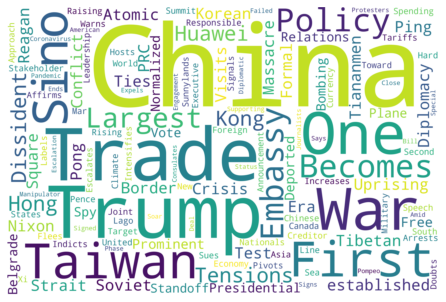

In [30]:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
# plt.savefig('wordcloud.png', bbox_inches = "tight")

> **By further exploring, we choose a timeline from 2019 to 2020 and narrow our search index keywords to [["People's Republic of China"], ['Trade War'], ['Huawai'], ['Korean War']]**

<!-- kw_list = ['People\'s Republic of China', 'Trade War', 'Huawei', 'Korean War']
kw_group = list(zip(*[iter(kw_list)] * 1))
print(kw_group)

kw_grplist = [list(x) for x in kw_group]
print(kw_grplist) -->

In [56]:
#Since, every search term in a list of lists, 
#build_payload() method will have to check every query one by one through our for loop.
trendshow = TrendReq(hl='en-US', tz=360)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 12-m', geo='US')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe.tail()

People's Republic of China  Trade War  Huawei  Korean War
date                                                                 
2020-09-27                          95         44      64          29
2020-10-04                          24         53      63          32
2020-10-11                          35         39      66          39
2020-10-18                          53         36      75          39
2020-10-25                          24         33      65          41

### draw the variable in a graph, and discuss its time-series variation

<!-- import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True) -->

<!-- trace = [go.Scatter(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns]

data = trace
layout = go.Layout(title='Post', showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig) -->

> **Graph below is the time-series variation of these four variables**
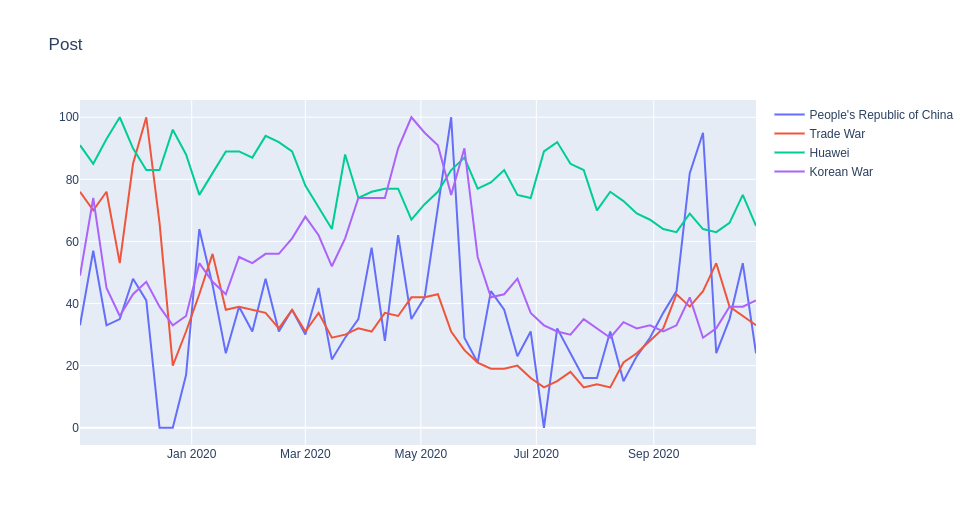

1) As we can see from above, the search volume about 'People's Republic of China' has been searched day by day, and what suprisingly is, in 5th Jul,2020, its search volume is 0 while 100 in 27th Sep, 2020.

2) It is obvious that the search volume of "Trade War" has dropped so much in 2020 compared to that in 2019.

3) As for the keyword 'Huawei', it is always a hot topic from its time-series variation since it is continuously searched and keep on a high search volume.

3) Also, for 'Korean War', since this year is the 70th year after U.S. being defeated by China in that war, its search volume is still high.

## Questions 2:
   using [Google Trends](https://trends.google.com/trends/?geo=US), construct a weekly index to predict the outcome of the 2020 US presidential election, draw the variable in a graph, and tell us who are more likely to win the final election.

***Reference***:

[US Elections in Search 2020](https://trends.google.com/trends/story/US_cu_b4fsy3IBAADxzM_en)

[2020 Presidential & VP Debates](https://trends.google.com/trends/story/US_cu_9KcWzHQBAACW6M_en)

[Pytrend Guidlines](https://www.holisticseo.digital/python-seo/google-trends/)

<!-- kw_list = ['donald trump', 'joe biden']
kw_group = list(zip(*[iter(kw_list)]*1))
print(kw_group)

kw_grplist = [list(x) for x in kw_group]
print(kw_grplist)

#Since, every search term in a list of lists, 
#build_payload() method will have to check every query one by one through our for loop.
trendshow = TrendReq(hl='en-US', tz=360)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 12-m', geo='US')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe.tail() -->

<!-- import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True)

trace = [go.Scatter(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns]

data = trace
layout = go.Layout(title='Post', showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig) -->

### The search volume of Donald Trump and Joe Biden 

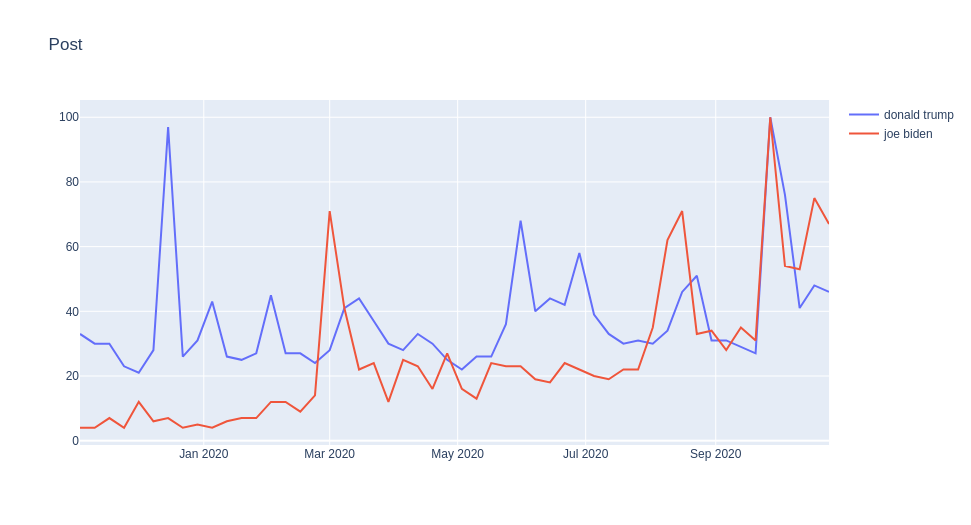

<!-- trace = [go.Bar(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns[0:2]]

data = trace
layout = go.Layout(title='Post', showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig) -->

**From a bar plot view of the search volumn**
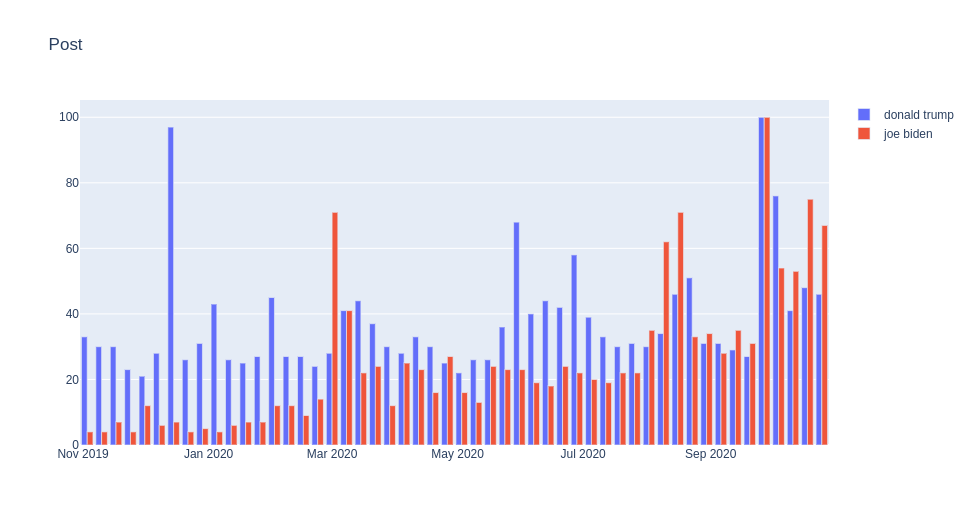

> **In my opinion, since who will win the final election is decided by the last point support rate instead of any last few minutes support rate, we should always focus on the latest search volume. And the latest 3 weeks above show that Joe Biden gained more focus than Donald Trump. Moreover, from the picture below, we can see that Biden is slightly ahead of Trump.**

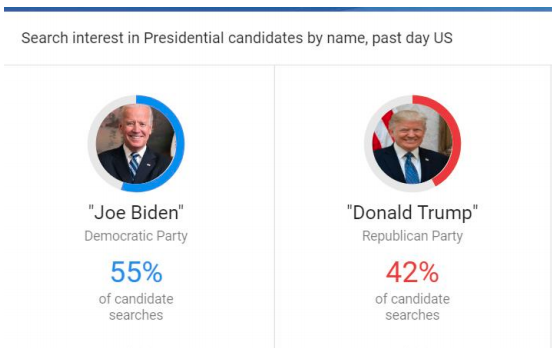

Thus I think **Joe Biden is more likely to win the final election.**


## Question 3: 
   using [Baidu Index](http://index.baidu.com/), construct an index to capture investor sentiment in the Chinese market, draw the variable in a graph, and discuss its time-series variation.

**Reference:**
   
 [1]  [如何利用百度指数进行数据分析？](http://www.woshipm.com/data-analysis/449898.html)
   
 [2]  [度小满联合百度指数发布2020年一季度国民投资理财情绪指数](https://sa.sogou.com/sgsearch/sgs_tc_news.php?req=oz6ZBzbyQOlRdfGHQtbF75yx_ZraGr9WnJvT0Fph4Ac=&user_type=1)

**Here we choose the keyword '黄金', which in English means Gold, as our index to capture investor sentiment in the Chinese market**

**According to Baidu Search Index, the graph below is its search trend of Baidu user in China**

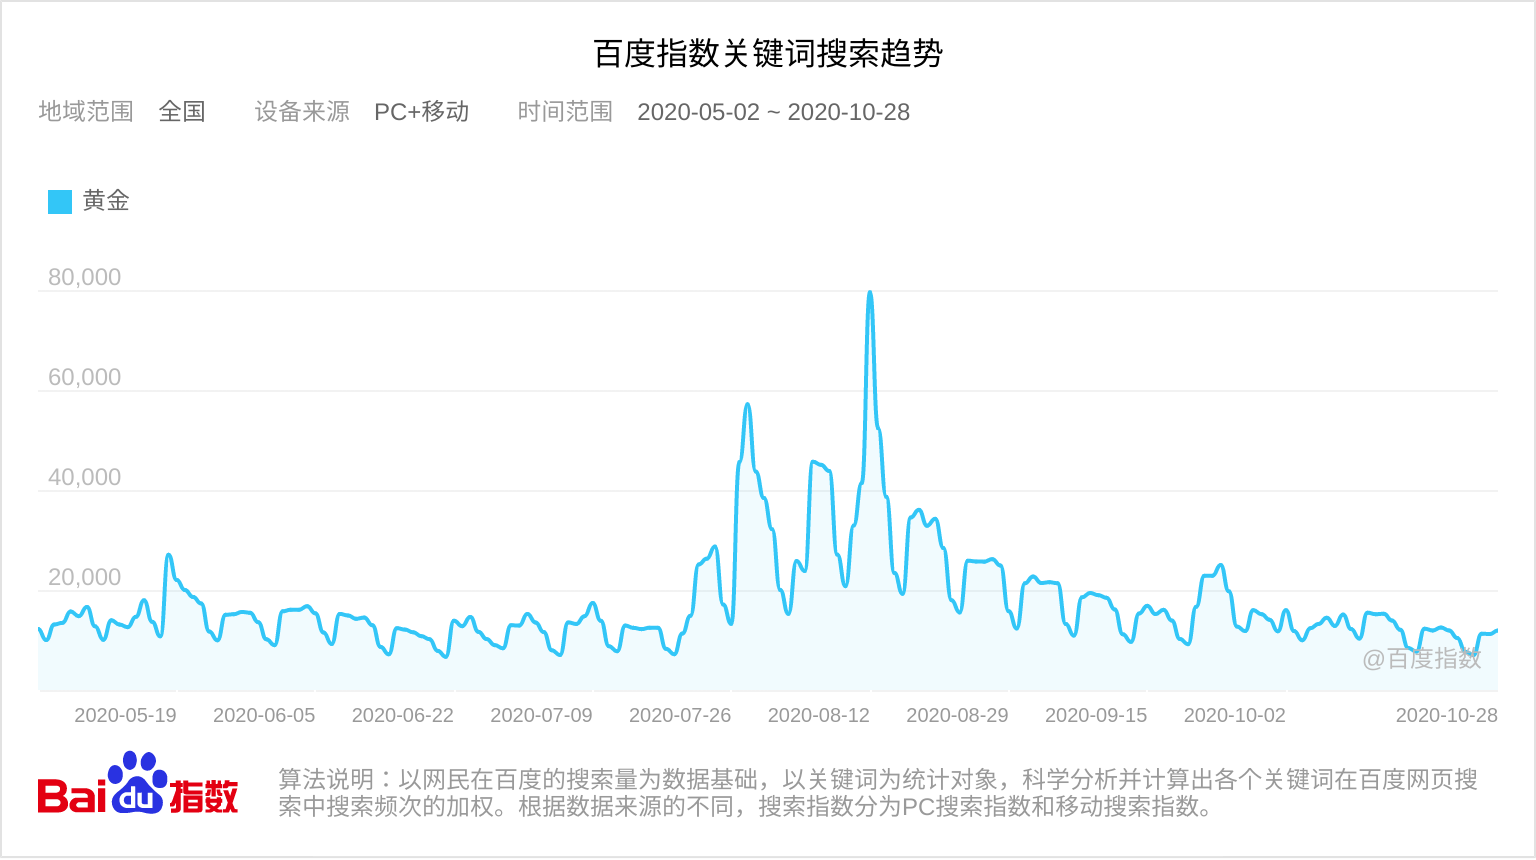

**Note:**

**1. Clearly, the time series variation of '黄金''s search trend is in certain period.**
    
**2. Besides, at the point of 2020-08-12, there is a peek search value that is much higher than any other points. By looking for the why this peek appeared, we got to know the reason is that the price of the Gold dropped sharply at that time.**

**3. Moreover, by comparing with keywords '美股' and 'a股' as follows， we can see the period is very similar. And we guess that it is due to the trade time related reason.**

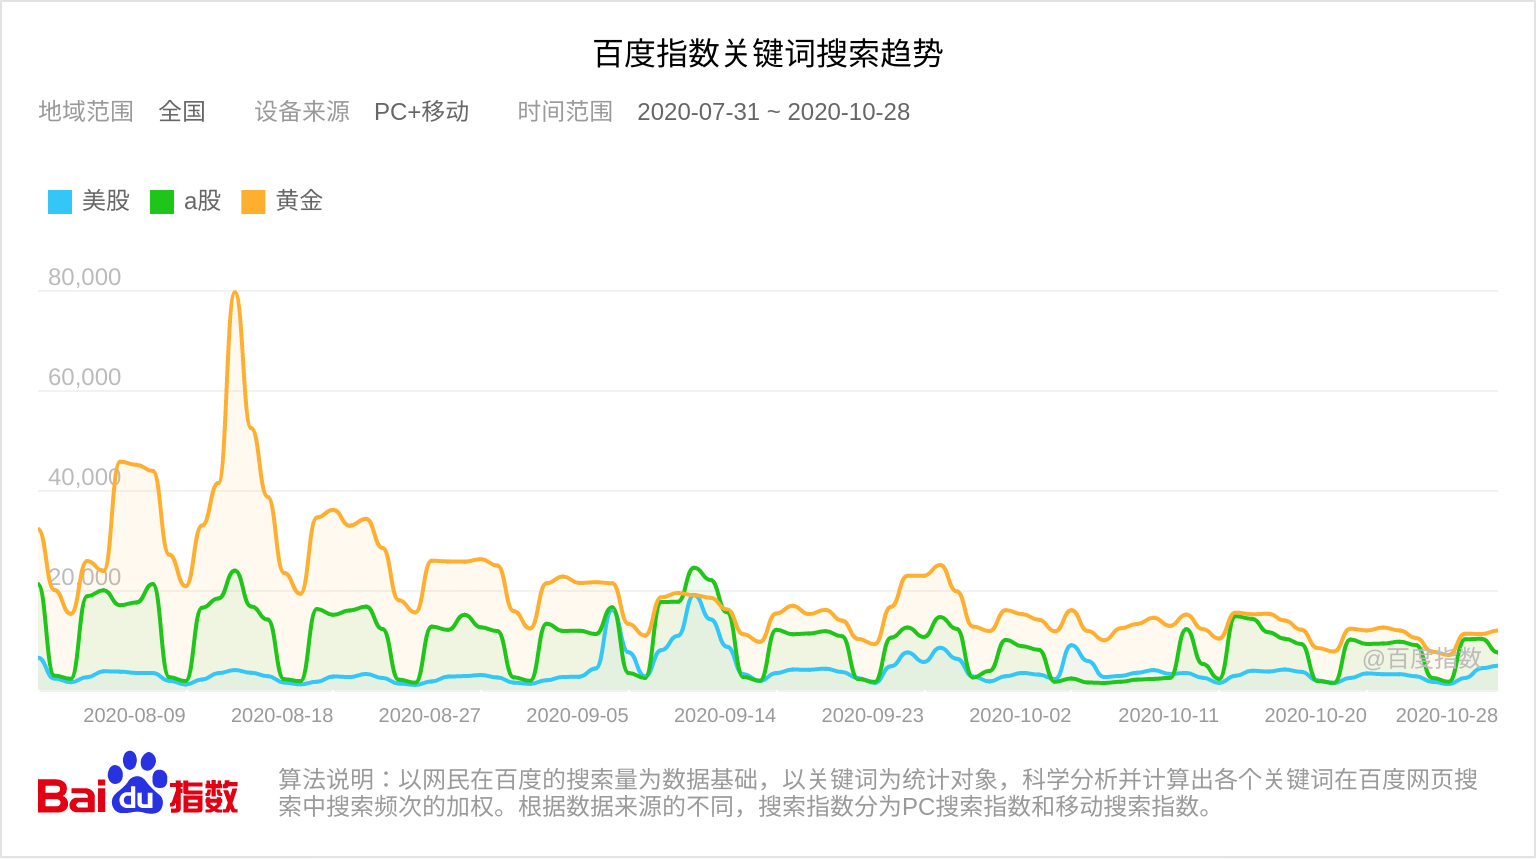